<a href="https://colab.research.google.com/github/CSID-DGU/2021-1-OSSP1-Debugger-4/blob/face-recognization/personal_color_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


73.36375947067091 93.09515238780898 128.74460900270836
99.90360848982662 125.04707025739097 160.34951249333793


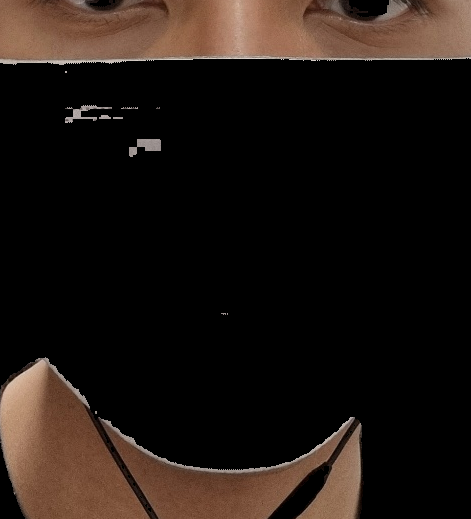

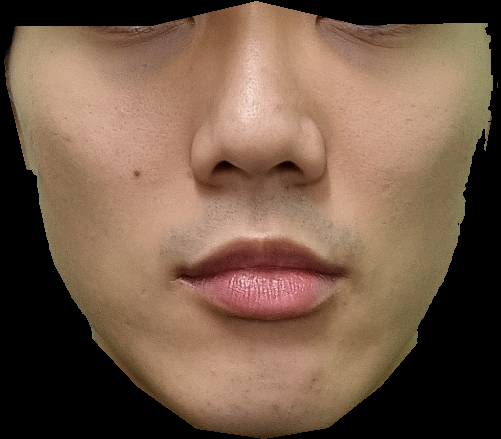

In [32]:
from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import dlib
import cv2
import math


face_img = cv2.imread('/gdrive/MyDrive/face2.jpg')
face_img = face_img[629:1148, 271:742].copy()

result = cv2.imread('/gdrive/MyDrive/result.png')

face_img_ycrcb = cv2.cvtColor(face_img, cv2.COLOR_BGR2YCrCb)
result_ycrcb = cv2.cvtColor(result, cv2.COLOR_BGR2YCrCb)

lower = np.array([0,133,77], dtype = np.uint8)
upper = np.array([255,173,127], dtype = np.uint8)
skin_msk = cv2.inRange(face_img_ycrcb, lower, upper)	
skin_msk2 = cv2.inRange(result_ycrcb, lower, upper)
skin1 = cv2.bitwise_and(face_img, face_img, mask = skin_msk)
skin2 = cv2.bitwise_and(result, result, mask = skin_msk2)

height, width, channel = skin1.shape
tmp = 0
black = 0
b1 = 0
g1 = 0
r1 = 0

for y in range(0, height):
  for x in range(0, width):
    b = skin1.item(y,x,0)
    g = skin1.item(y,x,1)
    r = skin1.item(y,x,2)

    if(b == 0 and g == 0 and r==0):
        black +=1
    else:
        tmp +=1
    b1 = b1+ b
    g1 = g1+ g
    r1 = r1+ r

height2, width2, channel2 = skin2.shape
tmp2 = 0
black = 0
b2 = 0
g2 = 0
r2 = 0

for y in range(0, height2):
  for x in range(0, width2):
    b = skin2.item(y,x,0)
    g = skin2.item(y,x,1)
    r = skin2.item(y,x,2)

    if(b == 0 and g == 0 and r==0):
        black +=1
    else:
        tmp2 +=1
    b2 = b2+ b
    g2 = g2+ g
    r2 = r2+ r


print(b1/tmp, g1/tmp, r1/tmp)
print(b2/tmp2, g2/tmp2, r2/tmp2)

cv2_imshow(skin1)
cv2_imshow(skin2)




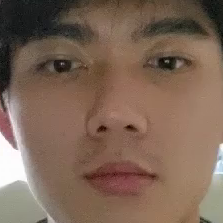

In [ ]:
from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import dlib
import cv2
import math
 

image = cv2.imread('/gdrive/MyDrive/videoimage/frame0.png')
#image = imutils.resize(image, width=1000)
image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
detector = dlib.get_frontal_face_detector()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)

for (i, rect) in enumerate(rects):
  (x, y, w, h) = face_utils.rect_to_bb(rect)
  #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  image = image[y:y+h,x:x+w]
  cv2_imshow(image)

In [ ]:
from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import dlib
import cv2
import os

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/gdrive/MyDrive/shape_predictor_68_face_landmarks.dat')

# load image
img = cv2.imread('/gdrive/MyDrive/와꾸.jpg')
img = imutils.resize(img, width=300)

h, w, ch = img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# add an alpha channel to image
b,g,r = cv2.split(img);
a = np.ones((h,w,1), np.uint8) * 255
img = cv2.merge((b, g, r, a))
# detect face
rects = detector(gray,1)
roi = rects[0] # region of interest
shape = predictor(gray, roi)
shape = face_utils.shape_to_np(shape)
# extract jawline
jawline = shape[0:17]
eyes = shape[36:48]


top = min(jawline[:,1])
bottom = max(jawline[:,1])
side1 = min(jawline[:,0])
side2 = max(jawline[:,0])
side = side2-side1

eyeline = max(eyes[:,1])
nose = shape[28][1]
newheight = int((eyeline+nose)/2)
# extend contour for masking

jawline = np.append(jawline, [ w-1, newheight ]).reshape(-1, 2)
jawline = np.append(jawline, [ w-1, h-1 ]).reshape(-1, 2)
jawline = np.append(jawline, [ 0, h-1 ]).reshape(-1, 2)
jawline = np.append(jawline, [ 0, newheight ]).reshape(-1, 2)
contours = [ jawline ]
# generate mask
mask = np.ones((h,w,1), np.uint8) * 255 # times 255 to make mask 'showable'
cv2.drawContours(mask, contours, -1, 0, -1) # remove below jawline
# apply to image
result = cv2.bitwise_and(img, img, mask = mask)
result = result[newheight:bottom, roi.left():roi.left()+side] # crop ROI
cv2.imwrite('/gdrive/MyDrive/result.png', result); 
print(jawline[0])
print(newheight, top, bottom)
print(roi.width(), side)

result_img = cv2.imread('/gdrive/MyDrive/result.png')
cv2_imshow(result_img)

RuntimeError: ignored